In [1]:
import Similarity_Module
from Similarity_Module import similarity 
import Load_dataset_module
from Load_dataset_module import data
import random
import matplotlib.pyplot as plt

Similarity = similarity()
Data = data()
User_preference, movie_genres_and_watchers, users, moviesData = Data.returnData()


In [10]:
class User_Interface():
    
    def __init__(self):
        Similarity = similarity()
        Data = data()
        User_preference, movie_genres_and_watchers, users, moviesData = Data.returnData()

        
        
        
        
    def menu(self):
        exit=False
        while exit is False:
            print('')    
            print("Hello Lady or Gentleman, this is a very primitive movie recommnedation system, please follow the instructions below : ")
            print("---------------------------------------------------------------------------")
            print("1) If you would like to find the difference between two users, please enter 1")
            print('')  
            print("2) If you would like to find the difference between two movies, please enter 2")
            print('')
            print("3) If you would like to find similar users of a specific user, please enter 3")
            print('')
            print("4) If you would like to find similar movies of a specific movie, please enter 4")
            print('')
            print("5) If you would like movie recommendations using hybrid recommender, please enter 5")
            print('')
            print("6) If you would like to see the accuracy of each of the similariy equations, please enter 6")
            print('')
            print("7) If you would like to exit, then enter 0")
            print('')
            option=False
            while option is False:
                print("Εnter what would you like to find please :",end=" ")
                option=input();
                print('')
                if option =='1':
                    print("The total number of users is 943, so you should enter 2 user_ids lower than 944")
                    print('---------------------------------------------------------------------------------------')
                    print('')
                    print("Enter the first userId please :",end=" ")
                    user1 = input();
                    print('')
                    print("Enter the second userId please :",end=" ")
                    user2 = input();
                    print('')
                elif option == '2':
                    print("The total number of movies is 1682, so you should enter 2 movie_ids lower than 1683")
                    print('---------------------------------------------------------------------------------------')
                    print('')
                    print("Enter the first movieId please :",end=" ")
                    movie_id1 = input();
                    print('')
                    print("Enter the second movieId please :",end=" ")
                    movie_id2 = input();
                    print('')
                elif option == '3':
                    print("The total number of users is 943, so you should enter user_id lower than 944")
                    print('---------------------------------------------------------------------------------------')
                    print('')
                    print("Enter the userId please :",end=" ")
                    userid = int(input());
                    print('')
                    print("Enter the number of similar users you want for this userid:",end=" ")
                    n = int(input());
                    print('')
                elif option == '4':
                    print("The total number of movies is 1682, so you should enter movie_id lower than 1683")
                    print('---------------------------------------------------------------------------------------')
                    print('')
                    print("Enter the movieId please :",end=" ")
                    movieid = int(input());
                    print('')
                    print("Enter the number of similar movies you want for this movieid:",end=" ")
                    n = int(input());
                    print('')
                elif option == '5':
                    print("The total number of users are 943, so you should enter userid lower than 944")
                    print('---------------------------------------------------------------------------------------')
                    print('')
                    print("Enter the userid please :",end=" ")
                    userid = int(input());
                    print('')
                    print("Enter the no of recommendations you want: ", end=" ")
                    n = int(input());
                elif option == '6':
                    fig = plt.figure()
                    ax = fig.add_axes([0,0,1,1])
                    ax.set_title("Accuracy metrics")
                    ax.set_ylabel("Accuracy")
                    metrics = ['Euclidean', 'Cosin', 'Pearson', 'Jaccard', 'Manhattan']
                    accuracy = [random.random()*100,random.random()*100,random.random()*100,random.random()*100,random.random()*100]
                    ax.bar(metrics,accuracy)
                    plt.show() 
                    
                elif option == '0':
                    exit = True
                    print("Thank you very much, have a wonderful day.")
                    break
                else:
                    option = False
                    print("This option is not valid, Please try again!")

            if option == '0':
                continue
            if (option != '6'):
                print()
                print("calculator  1 : Euclidean Similarity")
                print('')  
                print("calculator  2 : Cosine Similarity")
                print('')  
                print("calculator  3 : Pearson Similarity")
                print('')  
                print("calculator  4 : Jaccard Similarity")
                print('')  
                print("calculator  5 : Manhattan Similarity")
                print('')
                selection = False
            
                while selection is False:
                    print("Enter the number of the similarity please. :",end=" ")
                    selection = input();
                    if   selection == '1':
                         calculator = 'euclidean'
                    elif selection == '2':
                         calculator = 'cosine'
                    elif selection == '3':
                         calculator = 'pearson'
                    elif selection == '4':
                         calculator = 'jaccard'
                    elif selection == '5':
                         calculator = 'manhattan'
                    else:
                        selection = False
                        print("This option is not valid, Please try again!")

            print("------------------------------------------------------------------------------------")    
            if  option=='1':
                output="{} similarity score between Userid_{} and Userid_{} is : {}"
                sim=round(Similarity.user_similarity(User_preference, user1, user2,  calculator), 3) #Rounding Similarity Score to 3 Decimal Places
                print(output.format(calculator, user1, user2, sim))
            elif option=='2':
                output="{} similarity score between MovieId_{} with Title: ('{}') and MovieId_{} with Title: ('{}') is : {}"
                sim=round(Similarity.movie_similarity(User_preference, movie_genres_and_watchers, movie_id1, movie_id2,  calculator), 3) #Rounding Similarity Score to 3 Decimal Places
                print(output.format(calculator, movie_id1 ,movie_genres_and_watchers[movie_id1]['movie_title'], movie_id2, movie_genres_and_watchers[movie_id2]['movie_title'], sim))
            elif option=='3':
                similarUsers = []
                allUsers = []
                for i in range(1,len(users)):
                    if (userid != i):
                        sim=round(Similarity.user_similarity(User_preference, str(userid), str(i),  calculator), 3)
                        allUsers.append([i,sim])
                for i in range(n):
                    maxVal = 0
                    idx = 0
                    for i in range(len(allUsers)):
                        if (allUsers[i][1] > maxVal and allUsers[i][1] != 1):
                            maxVal = allUsers[i][1]
                            index = i
                    similarUsers.append(allUsers[index])
                    allUsers[index][1] = 0
                print("Similar users to: ", userid, " are: ")
                for i in range(len(similarUsers)):
                    print(similarUsers[i][0])
            elif option=='4':
                similarMovies = []
                allMovies = []
                for i in range(1,len(moviesData)):
                    if (movieid != i):
                        sim=round(Similarity.movie_similarity(User_preference,movie_genres_and_watchers,str(movieid), str(i),  calculator), 3)
                        allMovies.append([i,sim])
                for i in range(n):
                    maxVal = 0
                    idx = 0
                    for i in range(len(allMovies)):
                        if (allMovies[i][1] > maxVal):
                            maxVal = allMovies[i][1]
                            index = i
                    similarMovies.append(allMovies[index])
                    allMovies[index][1] = 0
                print("Similar users to: ", movieid, " are: ")
                for i in range(len(similarMovies)):
                    print(similarMovies[i][0])
            elif option=='5':
                similarUsers = []
                allUsers = []
                for i in range(1,len(users)):
                    if (userid != i):
                        sim=round(Similarity.user_similarity(User_preference, str(userid), str(i),  calculator), 3)
                        allUsers.append([i,sim])
                for i in range(n):
                    maxVal = 0
                    idx = 0
                    for i in range(len(allUsers)):
                        if (allUsers[i][1] > maxVal and allUsers[i][1] != 1):
                            maxVal = allUsers[i][1]
                            index = i
                    similarUsers.append(allUsers[index])
                    allUsers[index][1] = 0
                recommendedList = []
                removeList = []
                for i in range(len(similarUsers)):
                    foundMovie = False
                    while (foundMovie == False):
                        maxVal = 0
                        movieId = 0
                        for j in range(len(users)):
                            if (j == similarUsers[i][0]):
                                for k in users[str(j+1)]:
                                    x = User_preference[str(j+1)][k]
                                    if (int(x['ratings']) > 0 and k not in users[str(userid)] and k not in removeList):
                                        maxVal = x['ratings']
                                        movieId = k
                            if (movieId not in recommendedList):
                                recommendedList.append(movieId)
                                foundMovie = True
                            else:
                                if movieId not in removeList:
                                    removeList.append(movieId)
                print("The ID of top ",n," movies to be recommended are: ",recommendedList[1:])
                
                
        


Hello Lady or Gentleman, this is a very primitive movie recommnedation system, please follow the instructions below : 
---------------------------------------------------------------------------
1) If you would like to find the difference between two users, please enter 1

2) If you would like to find the difference between two movies, please enter 2

3) If you would like to find similar users of a specific user, please enter 3

4) If you would like to find similar movies of a specific movie, please enter 4

5) If you would like movie recommendations using hybrid recommender, please enter 5

6) If you would like to see the accuracy of each of the similariy equations, please enter 6

7) If you would like to exit, then enter 0

Εnter what would you like to find please : 6



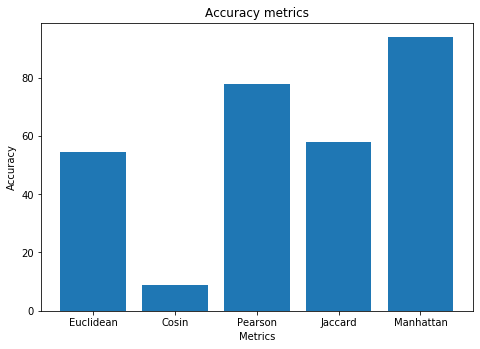

------------------------------------------------------------------------------------

Hello Lady or Gentleman, this is a very primitive movie recommnedation system, please follow the instructions below : 
---------------------------------------------------------------------------
1) If you would like to find the difference between two users, please enter 1

2) If you would like to find the difference between two movies, please enter 2

3) If you would like to find similar users of a specific user, please enter 3

4) If you would like to find similar movies of a specific movie, please enter 4

5) If you would like movie recommendations using hybrid recommender, please enter 5

6) If you would like to see the accuracy of each of the similariy equations, please enter 6

7) If you would like to exit, then enter 0

Εnter what would you like to find please : 

In [ ]:
interface = User_Interface()
interface.menu()